In [1]:
import pandas as pd
from vega_datasets import data
data.sf_temps()
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from datetime import datetime

## Working with Time Series Data Exercise

Use the above dataset for the exercises below:

1. Resample by the day and take the average temperature. Visualize the average temperature over time.
## Temp Data

In [2]:
temp = data.sf_temps()

In [3]:
temp.index = pd.to_datetime(temp.date)

temp.head()


,temp,date
date,,
2010-01-01 00:00:00,47.8,2010-01-01 00:00:00
2010-01-01 01:00:00,47.4,2010-01-01 01:00:00
2010-01-01 02:00:00,46.9,2010-01-01 02:00:00
2010-01-01 03:00:00,46.5,2010-01-01 03:00:00
2010-01-01 04:00:00,46.0,2010-01-01 04:00:00


Text(0.5, 1.0, 'Average Daily Temperature')

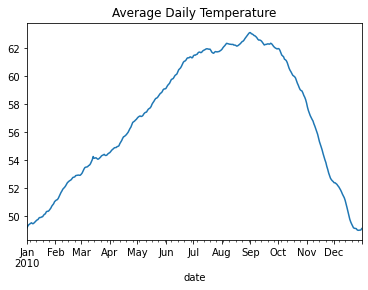

In [4]:
#avg temp
temp.resample('D').temp.mean().plot()
plt.title("Average Daily Temperature")

2. Write the code necessary to visualize the minimum temperature over time.

Text(0.5, 1.0, 'Daily Minimum Temperature')

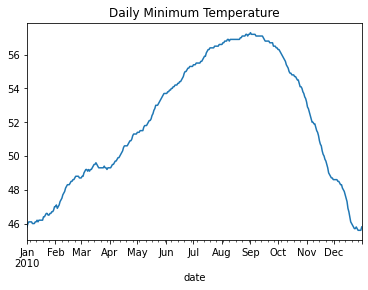

In [5]:
#min temp
temp.resample('D').temp.min().plot()
plt.title("Daily Minimum Temperature")

3. Write the code necessary to visualize the maximum temperature over time.

Text(0.5, 1.0, 'Daily Max Temperature')

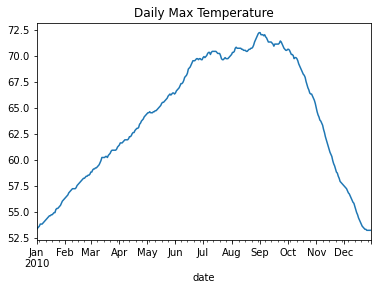

In [6]:
#max temp
temp.resample('D').temp.max().plot()
plt.title("Daily Max Temperature")

4. Which month is the coldest, on average?

In [7]:
#coldest month
temp.resample('M').temp.mean().idxmin().month_name()

'January'

5. Which month has the highest average temperature?

In [8]:
#hotest month
temp.resample('M').temp.mean().idxmax().month_name()

'September'

6. Resample by the day and calculate the min and max temp for the day (Hint: .agg(['min', 'max'])). Use this resampled dataframe to calculate the change in temperature for the day. Which month has the highest daily temperature variability?

In [9]:
#resample
temp.resample('D').temp.agg(
    ['min','max']).assign(
    temp_range = lambda row: row['max']-row['min']).resample('M').temp_range.mean().idxmax().month_name()

'September'

7. Bonus: Visualize the daily min, average, and max temperature over time on a single line plot, i.e. the min, average, and maximum temperature should be 3 seperate lines.


Text(0.5, 1.0, 'Daily Min, Mean, and Max Temperature')

<Figure size 1008x720 with 0 Axes>

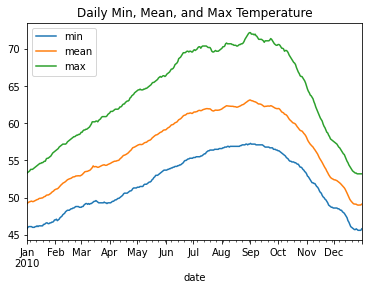

In [11]:
temp.resample('D').temp.agg(
    ['min','mean','max']).plot()
plt.title("Daily Min, Mean, and Max Temperature")

## Weather Data

Use the dataset to answer the following questions:

In [13]:
from vega_datasets import data
data.seattle_weather()


,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...,...
1456,2015-12-27,8.6,4.4,1.7,2.9,fog
1457,2015-12-28,1.5,5.0,1.7,1.3,fog
1458,2015-12-29,0.0,7.2,0.6,2.6,fog
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun




1 Which year and month combination has the highest amount of precipitation?

In [17]:
#define weather data
seattle = data.seattle_weather()

In [18]:
#get into dataframe
seattle.index = pd.to_datetime(seattle.date)
seattle = seattle.sort_index()

In [20]:
#print greatest precipitation
print("Greatest precipitation was in :",seattle.groupby([seattle.index.year, seattle.index.month]).precipitation.sum().idxmax())

Greatest precipitation was in : (2015, 12)


2. Visualize the amount of monthly precipitation over time.

Text(0.5, 1.0, 'Monthly Precipitation')

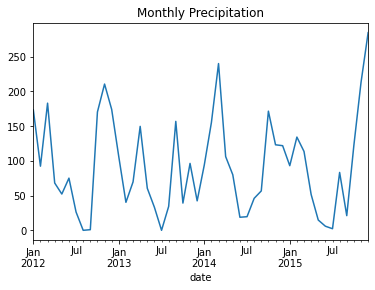

In [21]:
#viz monthly precipitation
seattle.resample('M').precipitation.sum().plot()
plt.title('Monthly Precipitation')

3. Visualize the amount of wind over time. Choose a time interval you think is appropriate.

Text(0.5, 1.0, 'Monthly Average Wind')

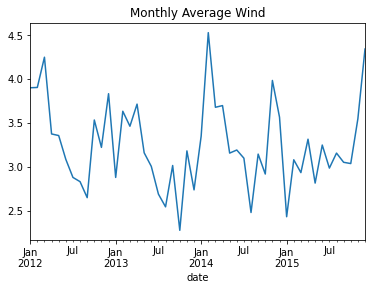

In [22]:
#viz amount of wind over time
seattle.resample('M').wind.mean().plot()
plt.title('Monthly Average Wind')

4. Which year-month combination is the windiest?

In [23]:
print("The windiest month was " , seattle.resample('M').wind.mean().idxmax().strftime('%b-%Y'))

The windiest month was  Feb-2014


5. What's the sunniest year? (Hint: which day has the highest number of days where weather == sun?)

In [24]:
print("The sunniest year was",(seattle.weather=='sun').resample('Y').sum().idxmax().year)


The sunniest year was 2014


6. In which month does it rain the most?

In [25]:
print("The rainiest month on average is",(seattle.weather=='rain').resample('M').sum().idxmax().month_name())

The rainiest month on average is November


7. Which month has the most number of days with a non-zero amount of precipitation?


In [26]:
print("The month with the most days of non-zero precipitation is",(seattle.precipitation>0).resample('M').sum().idxmax().month_name())

The month with the most days of non-zero precipitation is December


## Flight Data

In [27]:
data.flights_20k()


,date,delay,distance,origin,destination
0,2001-01-13 14:56:00,32,417,SAN,SJC
1,2001-01-31 16:40:00,-5,1093,FLL,ISP
2,2001-02-11 18:39:00,3,293,LBB,DAL
3,2001-01-10 21:00:00,-15,550,MSY,MCO
4,2001-03-30 21:45:00,-2,229,STL,IND
...,...,...,...,...,...
19995,2001-03-22 15:10:00,4,446,SAN,OAK
19996,2001-01-19 13:05:00,-6,1489,SEA,MCI
19997,2001-02-07 11:37:00,-16,1848,MCO,PHX
19998,2001-02-24 16:50:00,42,443,RDU,BNA


1. Convert any negative delays to 0.

In [28]:
#define flight data
flights = data.flights_20k()

In [29]:
#get data into dataframe
flights.index = pd.to_datetime(flights.date)
flights = flights.sort_index()

In [30]:
#convert negative delays to 0
flights.delay = np.where(flights.delay<0, 0, flights.delay)

2. Which hour of the day has the highest average delay?

In [32]:
print(f"Hour with highest average delay: {flights.groupby([flights.index.hour]).delay.mean().idxmax()}")

Hour with highest average delay: 3


3. Does the day of the week make a difference in the delay amount?


Text(0.5, 1.0, "Average Delay by Day: Don't fly on Fridays!")

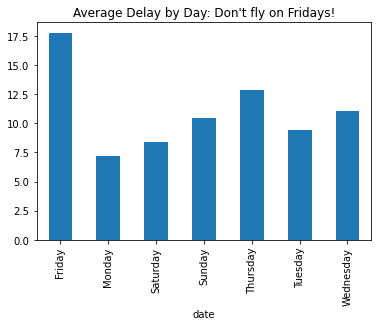

In [33]:
#most delays happen of Fridays
flights.groupby([flights.index.day_name()]).delay.mean().plot.bar()
plt.title("Average Delay by Day: Don't fly on Fridays!")

4. Does the month make a difference in the delay amount?


Text(0.5, 1.0, 'Average Delay by Month: February has Worse Delays on Average')

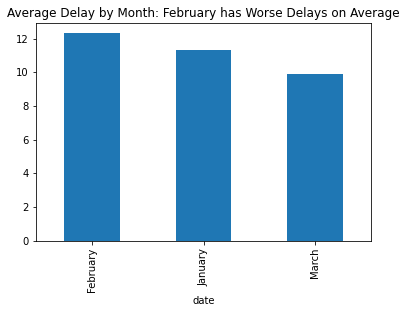

In [34]:
#February is worst
flights.groupby([flights.index.month_name()]).delay.mean().plot.bar()
plt.title("Average Delay by Month: February has Worse Delays on Average")

## Iowa Data

In [35]:
from vega_datasets import data
data.iowa_electricity()

,year,source,net_generation
0,2001-01-01,Fossil Fuels,35361
1,2002-01-01,Fossil Fuels,35991
2,2003-01-01,Fossil Fuels,36234
3,2004-01-01,Fossil Fuels,36205
4,2005-01-01,Fossil Fuels,36883
5,2006-01-01,Fossil Fuels,37014
6,2007-01-01,Fossil Fuels,41389
7,2008-01-01,Fossil Fuels,42734
8,2009-01-01,Fossil Fuels,38620
9,2010-01-01,Fossil Fuels,42750
